# Stablecoin data prep 

In [31]:
import pandas as pd
import json

# Load the JSON data
with open('stablecoins.json', 'r') as file:
    data = json.load(file)

# Extract the relevant data
rows = []
for asset in data['peggedAssets']:
    id = asset['id']
    name = asset['symbol']
    peg_mechanism = asset['pegMechanism']
    
    # Check if 'peggedUSD' exists in 'circulating'
    circulating_peggedUSD = int(asset['circulating'].get('peggedUSD', 0))

    # Extract chain circulating data
    for chain, chain_data in asset['chainCirculating'].items():
        current_peggedUSD = int(chain_data['current'].get('peggedUSD', 0))        
        rows.append({
            'id': id,
            'name': name,
            'pegMechanism': peg_mechanism,
            'circulating_peggedUSD': circulating_peggedUSD,
            'chain': chain,
            'current_peggedUSD': current_peggedUSD
        })

# Create a DataFrame
stablecoin_df = pd.DataFrame(rows)

# Display the DataFrame
print(stablecoin_df)

      id  name   pegMechanism  circulating_peggedUSD        chain  \
0      1  USDT    fiat-backed           127670074069     Optimism   
1      1  USDT    fiat-backed           127670074069    Statemine   
2      1  USDT    fiat-backed           127670074069        Manta   
3      1  USDT    fiat-backed           127670074069      Harmony   
4      1  USDT    fiat-backed           127670074069  ThunderCore   
..   ...   ...            ...                    ...          ...   
799  214  USDX  crypto-backed              180924395     Ethereum   
800  214  USDX  crypto-backed              180924395     Arbitrum   
801  215  USDM    fiat-backed                7536476      Cardano   
802  216  sUSD    fiat-backed               22397845       Solana   
803  217  rUSD    fiat-backed               11503619     Ethereum   

     current_peggedUSD  
0            843265051  
1               239993  
2              9034495  
3                    0  
4               677105  
..                 ..

In [59]:
# Drop duplicates to ensure distinct coins based on 'id' and 'name'
distinct_coins = stablecoin_df[['id', 'name', 'pegMechanism', 'circulating_peggedUSD']].drop_duplicates()

# Select the top 10 distinct coins by their 'id'
top_10_distinct_coins = distinct_coins.head(10)

# Display the top 10 distinct coins
print(top_10_distinct_coins)

     id  name   pegMechanism  circulating_peggedUSD
0     1  USDT    fiat-backed           127670074069
84    2  USDC    fiat-backed            36710068118
166   3  USTC    algorithmic                      0
183   4  BUSD    fiat-backed               68223497
216   5   DAI  crypto-backed             4677073760
262   6  FRAX    algorithmic              357174668
284   7  TUSD    fiat-backed              485485718
294   8  LUSD  crypto-backed               69163103
304   9   FEI    algorithmic                7384776
305  10   MIM  crypto-backed               42364262


In [60]:
# Filter the DataFrame to find the coin with the symbol 'PYUSD'
pyusd_df = stablecoin_df[stablecoin_df['id'] == '120'][['id', 'name', 'pegMechanism', 'circulating_peggedUSD']].drop_duplicates()

# Display the result
print(pyusd_df)

      id   name pegMechanism  circulating_peggedUSD
582  120  PYUSD  fiat-backed              501000824


In [62]:
# ... existing code ...

# Union top_10_distinct_coins with pyusd_df
combined_df = pd.concat([top_10_distinct_coins, pyusd_df], ignore_index=True).drop_duplicates()

# Drop the row at index 2
combined_df = combined_df.drop(index=2)

# Display the combined DataFrame
print(combined_df)

     id   name   pegMechanism  circulating_peggedUSD
0     1   USDT    fiat-backed           127670074069
1     2   USDC    fiat-backed            36710068118
3     4   BUSD    fiat-backed               68223497
4     5    DAI  crypto-backed             4677073760
5     6   FRAX    algorithmic              357174668
6     7   TUSD    fiat-backed              485485718
7     8   LUSD  crypto-backed               69163103
8     9    FEI    algorithmic                7384776
9    10    MIM  crypto-backed               42364262
10  120  PYUSD    fiat-backed              501000824


In [86]:
stc_ms_df = pd.read_csv('/Users/zachdenton1gmail.com/blockchain code/stablecoin_mc/stc_mc - stablecoins.csv')

# Select all columns except 'Date'
numeric_cols = stc_ms_df.columns.drop('Date')

# Convert the selected columns to numeric, coercing errors to NaN
stc_ms_df[numeric_cols] = stc_ms_df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Display the DataFrame
print(stc_ms_df)



      Timestamp        Date          USDT         USDC        PYUSD  \
0    1731369600  2024-11-12  124521598923  36816867881  535308243.4   
1    1731283200  2024-11-11  124088086130  37179471913  547961186.0   
2    1731196800  2024-11-10  123358597847  36868739164  547961186.0   
3    1731110400  2024-11-09  123092672428  37062038633  547413772.0   
4    1731024000  2024-11-08  122159677788  36823262419  542575305.0   
..          ...         ...           ...          ...          ...   
677  1672876800  2023-01-05   66236484982  43711606798          NaN   
678  1672790400  2023-01-04   66232840220  43755897726          NaN   
679  1672704000  2023-01-03   66233172164  44295880516          NaN   
680  1672617600  2023-01-02   66229859346  44205779414          NaN   
681  1672531200  2023-01-01   66237201876  44138662628          NaN   

             USDe         DAI         FDUSD  
0    2.993472e+09  4725164276  2.024057e+09  
1    2.940525e+09  4741285322  2.048255e+09  
2    2.91

In [88]:
# Generate summary statistics
summary_stats = stc_ms_df.describe()

# Display the summary statistics
print(summary_stats)


          Timestamp          USDT          USDC         PYUSD          USDe  \
count  6.820000e+02  6.820000e+02  6.820000e+02  4.630000e+02  3.380000e+02   
mean   1.701950e+09  9.436503e+10  3.085632e+10  3.204082e+08  2.022373e+09   
std    1.702259e+07  1.641817e+10  5.494415e+09  2.623380e+08  1.227570e+09   
min    1.672531e+09  6.622986e+10  2.317155e+10  7.800000e+01  4.945329e+06   
25%    1.687241e+09  8.300966e+10  2.580643e+10  1.150970e+08  7.314393e+08   
50%    1.701950e+09  9.016190e+10  3.089821e+10  2.584766e+08  2.439108e+09   
75%    1.716660e+09  1.114929e+11  3.405653e+10  5.614427e+08  2.988741e+09   
max    1.731370e+09  1.245216e+11  4.429588e+10  1.012876e+09  3.604552e+09   

                DAI         FDUSD  
count  6.820000e+02  4.740000e+02  
mean   5.008691e+09  1.825919e+09  
std    3.585572e+08  9.972493e+08  
min    3.920110e+09  2.020436e+07  
25%    4.822019e+09  6.836001e+08  
50%    5.102287e+09  2.024550e+09  
75%    5.230024e+09  2.510827e+09  


In [89]:
# Calculate skewness
skewness = stc_ms_df.skew()
print("Skewness:\n", skewness)

# Calculate kurtosis
kurtosis = stc_ms_df.kurtosis()
print("\nKurtosis:\n", kurtosis)


Skewness:
 Timestamp    0.000000
USDT         0.161008
USDC         0.644351
PYUSD        0.857366
USDe        -0.544463
DAI         -0.890032
FDUSD       -0.143007
dtype: float64

Kurtosis:
 Timestamp   -1.200000
USDT        -1.225022
USDC        -0.284277
PYUSD       -0.353367
USDe        -1.227814
DAI          1.104782
FDUSD       -0.933498
dtype: float64


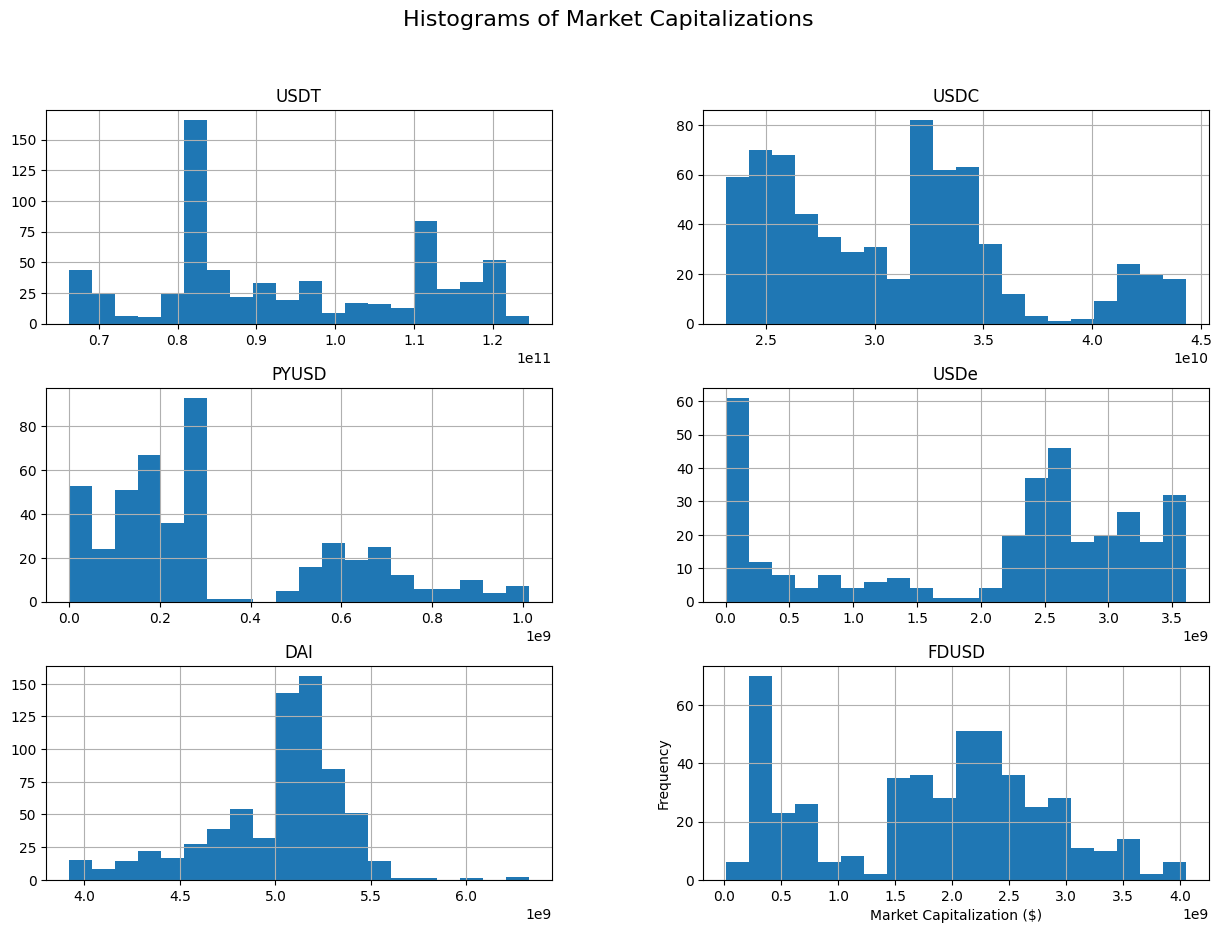

In [90]:
import matplotlib.pyplot as plt

# Plot histograms for each coin
stc_ms_df.hist(column=market_cap_columns, bins=20, figsize=(15, 10))
plt.suptitle('Histograms of Market Capitalizations', fontsize=16)
plt.xlabel('Market Capitalization ($)')
plt.ylabel('Frequency')
plt.show()


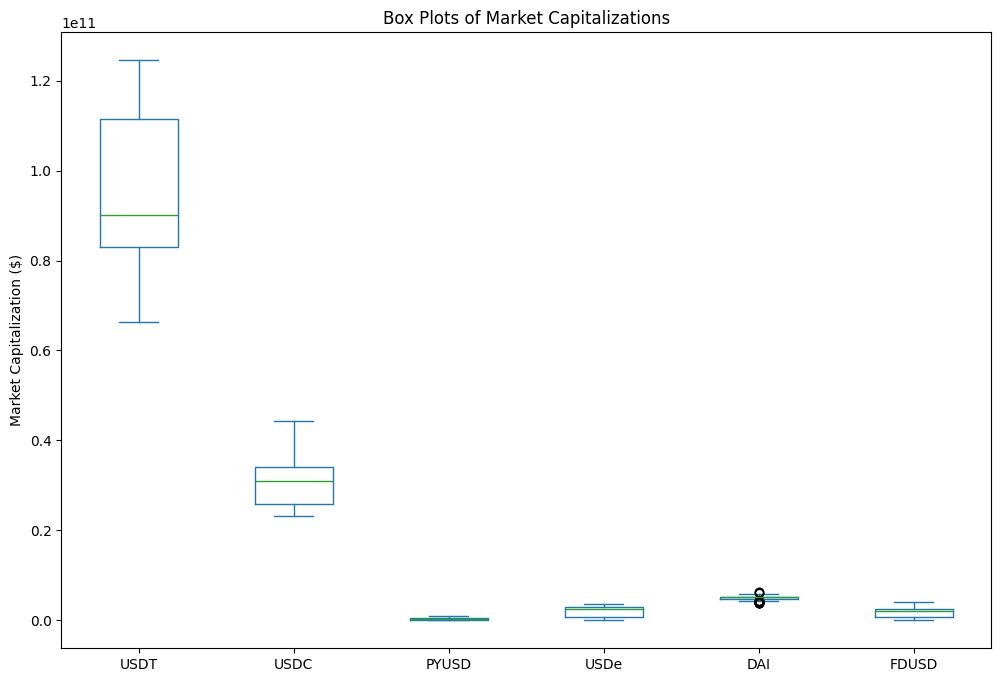

In [91]:
# Plot box plots for each coin
stc_ms_df[market_cap_columns].plot(kind='box', figsize=(12, 8))
plt.title('Box Plots of Market Capitalizations')
plt.ylabel('Market Capitalization ($)')
plt.show()


NameError: name 'legend' is not defined

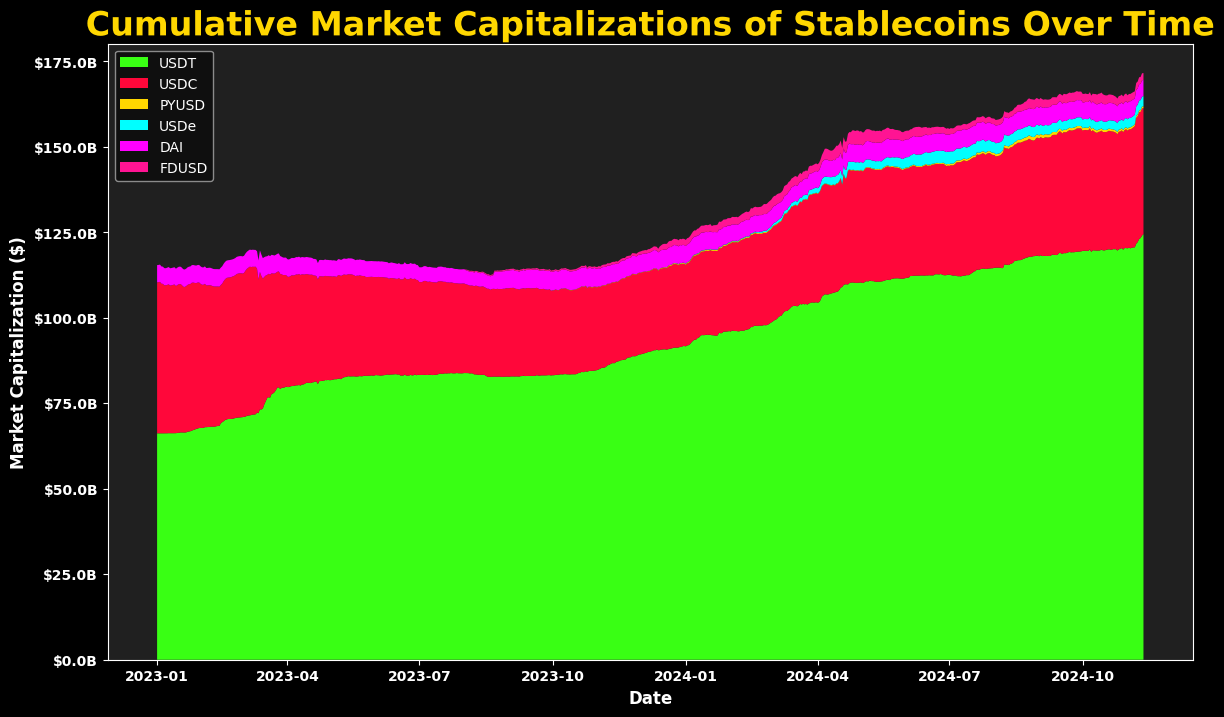

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.colors as mcolors
import matplotlib.patheffects as path_effects  # For text effects

# Ensure that the index is datetime format (assuming 'Date' is the index)
stc_ms_df.index = pd.to_datetime(stc_ms_df.index)

# Select the columns containing market cap data
# Exclude 'Timestamp' column if not needed
market_cap_columns = stc_ms_df.columns.drop('Timestamp')

# Ensure all market cap columns are numeric
stc_ms_df[market_cap_columns] = stc_ms_df[market_cap_columns].apply(pd.to_numeric, errors='coerce')

# Sort the DataFrame by index to ensure the dates are in order
stc_ms_df.sort_index(inplace=True)

# Fill NaN values with zeros (optional, but recommended for stackplot)
stc_ms_df[market_cap_columns] = stc_ms_df[market_cap_columns].fillna(0)

# Prepare data for the stackplot
dates = stc_ms_df.index
data = [stc_ms_df[coin] for coin in market_cap_columns]

# Set the style to dark background
plt.style.use('dark_background')

# Define neon colors for each stablecoin
neon_colors = [
    '#39FF14',  # Neon Green
    '#FF073A',  # Neon Red
    '#FFD700',  # Neon Yellow
    '#00FFFF',  # Neon Cyan
    '#FF00FF',  # Neon Magenta
    '#FF1493'   # Neon Pink
]

# Ensure we have enough colors for all coins
if len(neon_colors) < len(market_cap_columns):
    neon_colors = (neon_colors * (len(market_cap_columns) // len(neon_colors) + 1))[:len(market_cap_columns)]

# Plot the stacked area chart
plt.figure(figsize=(14, 8))
plt.stackplot(dates, data, labels=market_cap_columns, colors=neon_colors)

# Set axes background to transparent dark grey
ax = plt.gca()
ax.set_facecolor(mcolors.to_rgba('#2F2F2F', alpha=0.7))  # Transparent dark grey

# Remove grid lines
plt.grid(False)

# Format y-axis to display in billions of dollars
def billions(x, pos):
    return '${:1.1f}B'.format(x * 1e-9)

formatter = ticker.FuncFormatter(billions)
ax.yaxis.set_major_formatter(formatter)

# Customize plot aesthetics for dark theme
plt.xlabel('Date', color='white', fontsize=12, fontweight='bold')
plt.ylabel('Market Capitalization ($)', color='white', fontsize=12, fontweight='bold')

# Update the title with larger font size and neon color
title_text = plt.title(
    'Cumulative Market Capitalizations of Stablecoins Over Time',
    color='#FFD700',  # Neon Yellow
    fontsize=24,
    fontweight='bold'
)

# Apply shadow effect to the title (optional)
title_text.set_path_effects([path_effects.SimpleLineShadow(), path_effects.Normal()])

# Customize tick labels to be bold
plt.xticks(color='white', fontweight='bold')
plt.yticks(color='white', fontweight='bold')

# Customize legend
plt.legend(loc='upper left', facecolor='black', framealpha=0.5, edgecolor='white', labelcolor='white')

# Set legend text to bold
for text in legend.get_texts():
    text.set_fontweight('bold')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()
